# Company Bankruptcy prediction

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,accuracy_score
from matplotlib import pyplot
from xgboost import plot_importance
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Lenovo\SSN Study Materials\ML My Works\Data Science Projects\Bankruptcy Prediction\Bankruptcy Prediction.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# **Data Profiling**

In [5]:
#Shape of the dataset
df.shape

(6819, 96)

In [6]:
#Statistical summary of data
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
#feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Observation:
* All the features are numeric. No need of any encoding techniques

In [8]:
#Checking for missing values
c=0
for col in df.columns:
    null_values_count = df[col].isnull().sum()
    if null_values_count > 0:
        c=c+1
        print(col,null_values_count)

if c==0:
    print("No missing values found in the dataset")

No missing values found in the dataset


# Feature Selection

In [9]:
X=df.drop(['Bankrupt?'],axis=1)
y=df['Bankrupt?']
var_thres = VarianceThreshold(3.0)
var_thres.fit(X)

VarianceThreshold(threshold=3.0)

In [10]:
required_features = [col for col in X.columns if col in X.columns[var_thres.get_support()]]
print(required_features)

[' Operating Expense Rate', ' Research and development expense rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio', ' Total debt/Total net worth', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Revenue per person', ' Allocation rate per person', ' Quick Assets/Current Liability', ' Cash/Current Liability', ' Inventory/Current Liability', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Quick Asset Turnover Rate', ' Cash Turnover Rate', ' Fixed Assets to Assets', ' Total assets to GNP price']


In [11]:
len(required_features)

24

Observation:
* 24 features are selected. Features having variance of less than 3.0 has been dropped

In [12]:
df_v1 = df[required_features]
df_v1.head()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
0,1.256969e-04,0.0,0.000725,0.017560,4.980000e+09,0.000327,0.002259,0.001208,0.021266,0.001814,...,0.037135,0.001997,1.473360e-04,0.001036,0.025592,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.009219
1,2.897851e-04,0.0,0.000647,0.021144,6.110000e+09,0.000443,0.006016,0.004039,0.012502,0.001286,...,0.012335,0.004136,1.383910e-03,0.005210,0.023947,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.008323
2,2.361297e-04,25500000.0,0.000790,0.005944,7.280000e+09,0.000396,0.011543,0.005348,0.021248,0.001495,...,0.141016,0.006302,5.340000e+09,0.013879,0.003715,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.040003
3,1.078888e-04,0.0,0.000449,0.014368,4.880000e+09,0.000382,0.004194,0.002896,0.009572,0.001966,...,0.021320,0.002961,1.010646e-03,0.003540,0.022165,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.003252
4,7.890000e+09,0.0,0.000686,0.029690,5.510000e+09,0.000439,0.006022,0.003727,0.005150,0.001449,...,0.023988,0.004275,6.804636e-04,0.004869,0.000000,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.003878


In [13]:
#Checking for multicollinearity
df_v1_corr = df_v1.corr()
df_v1_corr.style.background_gradient(cmap='coolwarm')

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
Operating Expense Rate,1.000000,-0.060386,-0.006011,-0.015838,0.014168,-0.008456,-0.007464,0.017687,-0.016164,-0.028331,-0.007935,-0.129214,-0.055160,-0.010492,-0.009231,-0.012904,0.024258,-0.011448,0.001729,0.170776,0.153936,0.040730,-0.007464,-0.025524
Research and development expense rate,-0.060386,1.000000,0.000656,-0.019291,0.023189,-0.010300,-0.009092,-0.025702,-0.019292,-0.034508,-0.028471,0.001366,0.016872,-0.012780,-0.028073,-0.015717,-0.042133,-0.023691,0.008636,-0.046460,-0.034643,0.070369,-0.009092,-0.020166
Interest-bearing debt interest rate,-0.006011,0.000656,1.000000,-0.003904,-0.018700,0.013614,-0.001840,-0.005201,-0.003984,-0.006983,0.016496,0.007713,-0.036213,-0.002586,0.024254,0.055143,-0.011063,0.011240,0.006090,-0.009759,-0.026821,-0.019243,-0.001840,-0.007519
Revenue Per Share (Yuan ¥),-0.015838,-0.019291,-0.003904,1.000000,-0.010670,-0.000353,-0.000311,-0.000880,0.029592,0.264346,-0.000985,-0.011734,-0.010462,0.275742,-0.000982,-0.000538,-0.001871,0.037494,-0.002441,-0.010894,-0.016476,-0.021618,-0.000311,-0.001272
Total Asset Growth Rate,0.014168,0.023189,-0.018700,-0.010670,1.000000,-0.008688,0.006779,-0.013451,-0.012469,-0.030866,-0.035608,0.030277,0.009155,-0.017423,-0.010750,-0.002528,0.006808,-0.011164,0.016918,0.000739,0.032340,0.064419,0.006570,-0.038909
Net Value Growth Rate,-0.008456,-0.010300,0.013614,-0.000353,-0.008688,1.000000,-0.000166,-0.000470,-0.000360,-0.000631,-0.000526,-0.009009,0.036004,-0.000234,-0.000524,0.075915,-0.000999,-0.001316,-0.001303,0.008879,0.006129,-0.002081,-0.000166,-0.000679
Current Ratio,-0.007464,-0.009092,-0.001840,-0.000311,0.006779,-0.000166,1.000000,-0.000415,-0.000318,-0.000557,-0.000464,-0.007943,-0.004931,-0.000206,-0.000463,-0.000254,-0.000882,-0.001161,-0.001150,-0.002240,-0.007291,-0.003635,-0.000147,-0.000599
Quick Ratio,0.017687,-0.025702,-0.005201,-0.000880,-0.013451,-0.000470,-0.000415,1.000000,-0.000898,-0.001574,0.016026,-0.019058,0.001797,-0.000583,-0.001309,-0.000717,0.151987,-0.003283,-0.003252,-0.014514,0.007069,-0.022126,-0.000415,-0.001694
Total debt/Total net worth,-0.016164,-0.019292,-0.003984,0.029592,-0.012469,-0.000360,-0.000318,-0.000898,1.000000,0.008627,-0.001005,-0.013441,0.016062,-0.000446,-0.001002,-0.000549,-0.001910,-0.002515,-0.002491,-0.011118,-0.016815,-0.016561,-0.000318,-0.001298
Accounts Receivable Turnover,-0.028331,-0.034508,-0.006983,0.264346,-0.030866,-0.000631,-0.000557,-0.001574,0.008627,1.000000,-0.001762,-0.013201,-0.001709,0.032398,-0.001757,-0.000962,0.036912,0.048829,-0.001859,-0.019486,-0.029472,-0.022508,-0.000557,0.113731


array([[<AxesSubplot:title={'center':' Operating Expense Rate'}>,
        <AxesSubplot:title={'center':' Research and development expense rate'}>,
        <AxesSubplot:title={'center':' Interest-bearing debt interest rate'}>,
        <AxesSubplot:title={'center':' Revenue Per Share (Yuan ¥)'}>,
        <AxesSubplot:title={'center':' Total Asset Growth Rate'}>],
       [<AxesSubplot:title={'center':' Net Value Growth Rate'}>,
        <AxesSubplot:title={'center':' Current Ratio'}>,
        <AxesSubplot:title={'center':' Quick Ratio'}>,
        <AxesSubplot:title={'center':' Total debt/Total net worth'}>,
        <AxesSubplot:title={'center':' Accounts Receivable Turnover'}>],
       [<AxesSubplot:title={'center':' Average Collection Days'}>,
        <AxesSubplot:title={'center':' Inventory Turnover Rate (times)'}>,
        <AxesSubplot:title={'center':' Fixed Assets Turnover Frequency'}>,
        <AxesSubplot:title={'center':' Revenue per person'}>,
        <AxesSubplot:title={'center':

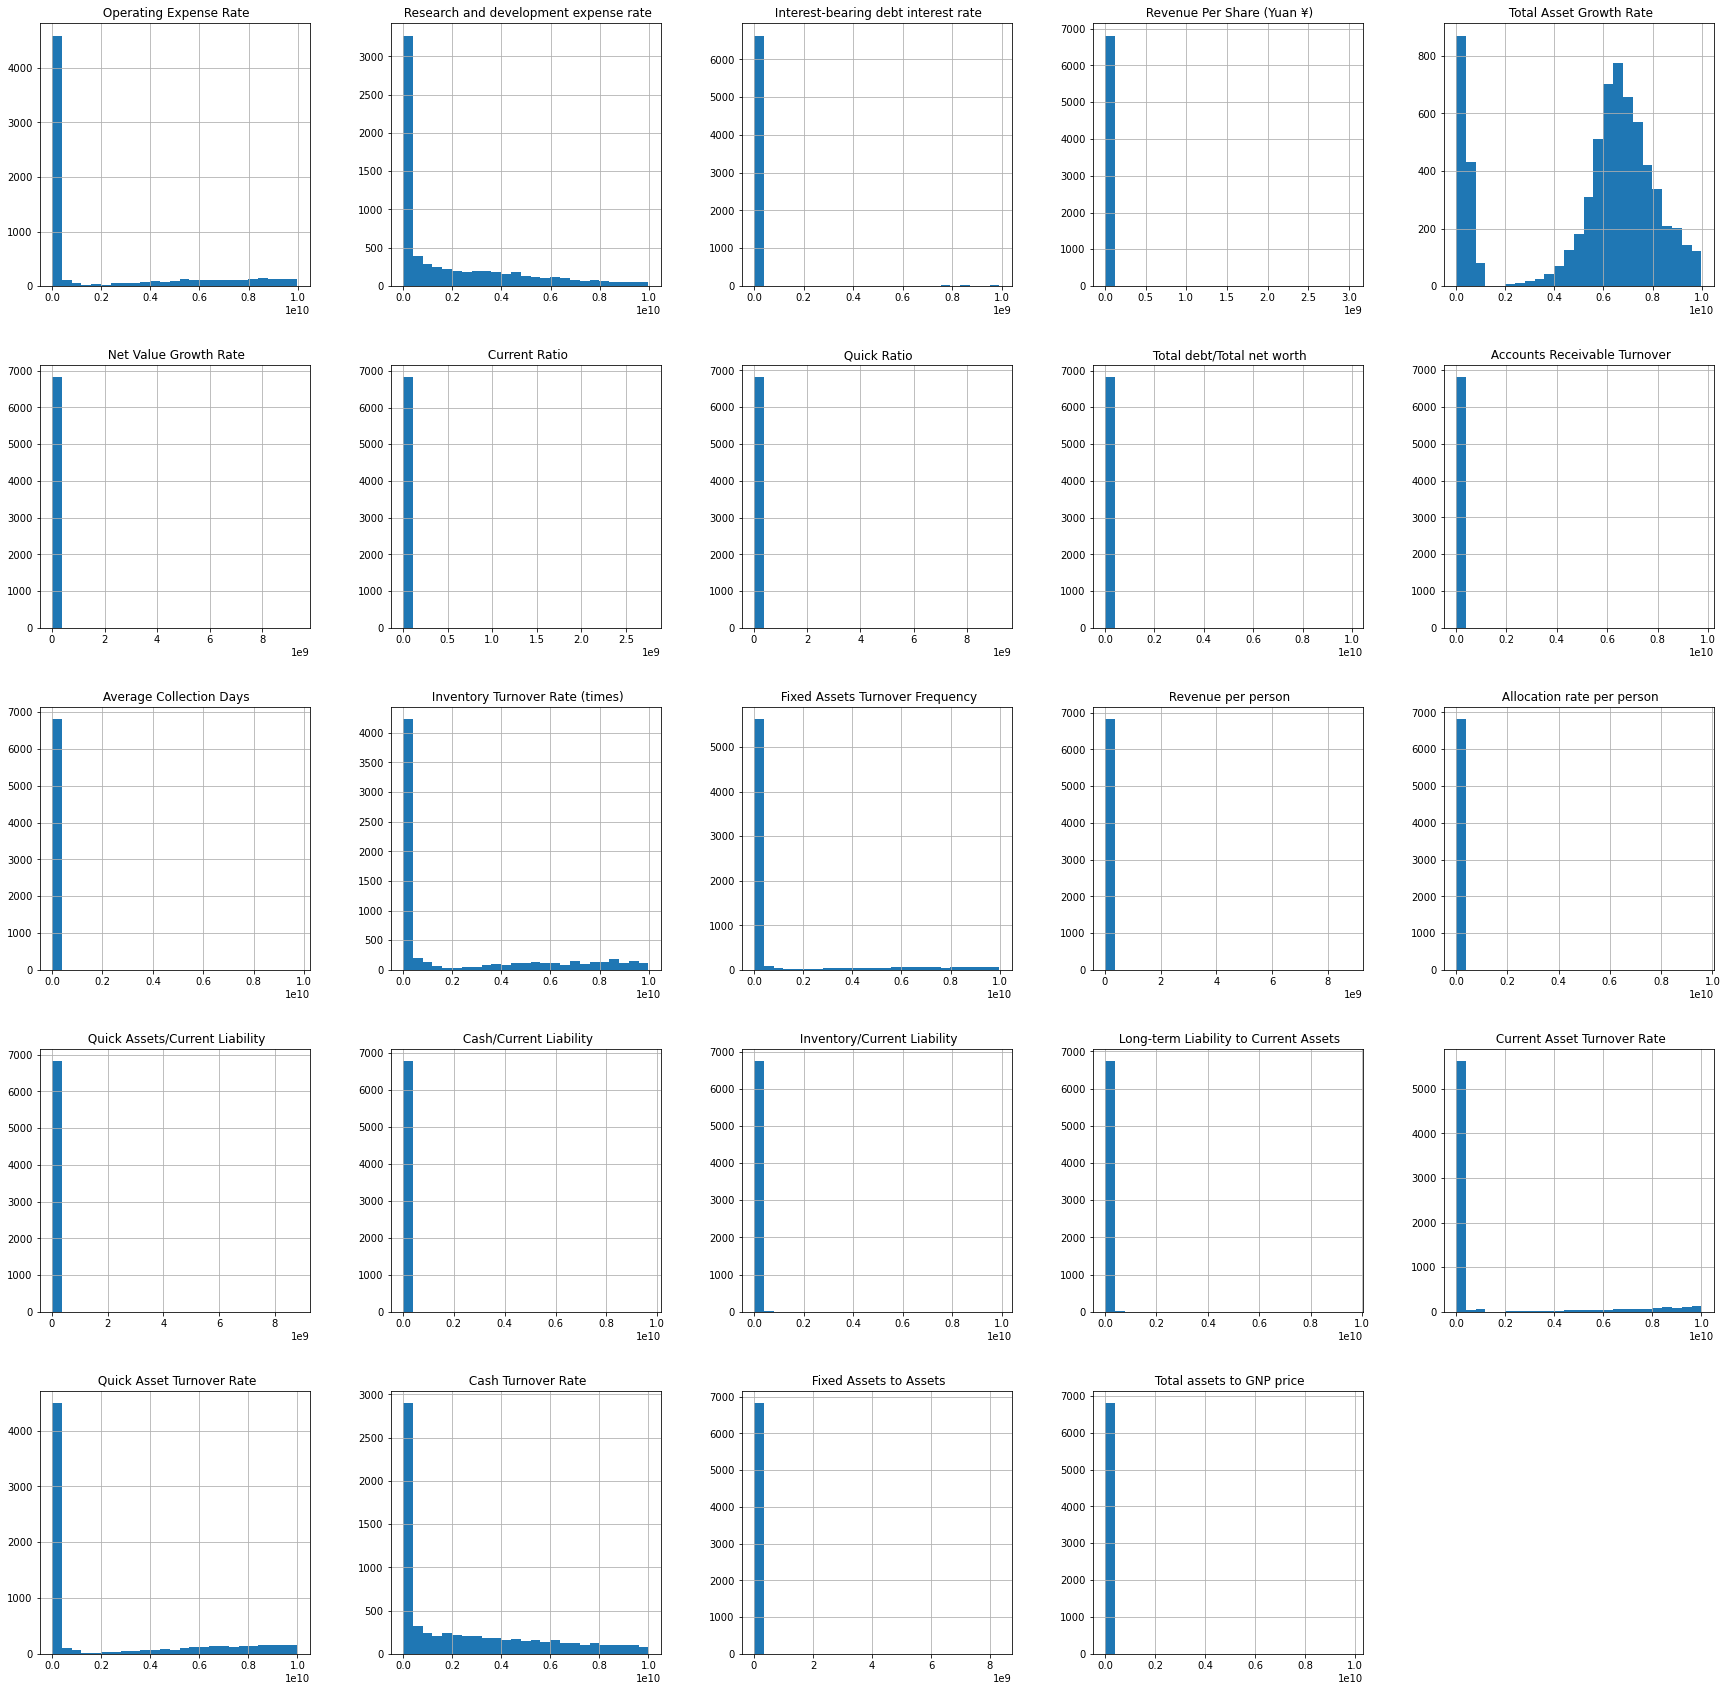

In [14]:
#Distribution of features
df_v1.hist(bins=25,figsize = (30,30))

# SMOTE technique

In [15]:
df.groupby('Bankrupt?')['Bankrupt?'].count()

Bankrupt?
0    6599
1     220
Name: Bankrupt?, dtype: int64

Observation:
* The dataset contains unbalanced classes. This issue can be resolved by using SMOTE technique

In [17]:
X_new = df[required_features] #Taking the required independent variables
y_new = df['Bankrupt?'] #Dependent variable

#Initializing SMOTE
sm = SMOTE(random_state=42)
X_smote,y_smote = sm.fit_resample(X_new,y_new)

In [18]:
count_class = Counter(y_smote)
print(count_class)

Counter({1: 6599, 0: 6599})


# Model selection and building

In [19]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.3, random_state=42)

In [20]:
models = {
    'SVM':{'model':svm.SVC(gamma='auto',C=5,kernel='rbf'),'params': {'C': [1,5,10]}},
    'xgboost':{'model':xgb.XGBClassifier(),'params': {'max_depth':[4,6,8]}},
    'random_forest': {'model': RandomForestClassifier(),'params': {'n_estimators': [1,5]}},
    'logistic_regression' : {'model': LogisticRegression(solver='liblinear',multi_class='auto'),'params': {'C': [1,5]}},
    'naive_bayes_gaussian': {'model': GaussianNB(),'params': {}},
    'decision_tree': {'model': DecisionTreeClassifier(),'params': {'criterion': ['gini','entropy']}}
}

In [21]:
scores = []

for model_name, mp in models.items():
    clf =  GridSearchCV(mp['model'],mp['params'] ,cv= 2, return_train_score=False)
    clf.fit(X_smote, y_smote)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

[18:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:12:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,model,best_score,best_params
0,SVM,0.509926,{'C': 1}
1,xgboost,0.947492,{'max_depth': 6}
2,random_forest,0.930974,{'n_estimators': 5}
3,logistic_regression,0.552735,{'C': 1}
4,naive_bayes_gaussian,0.520306,{}
5,decision_tree,0.922261,{'criterion': 'entropy'}


**Observation:**
* Xgboost classifier performs well than other models

In [22]:
#Xgboost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
ypred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test,ypred_xgb))

[18:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2005
           1       0.97      1.00      0.99      1955

    accuracy                           0.99      3960
   macro avg       0.99      0.99      0.99      3960
weighted avg       0.99      0.99      0.99      3960



In [23]:
print(accuracy_score(y_test,ypred_xgb))

0.9853535353535353


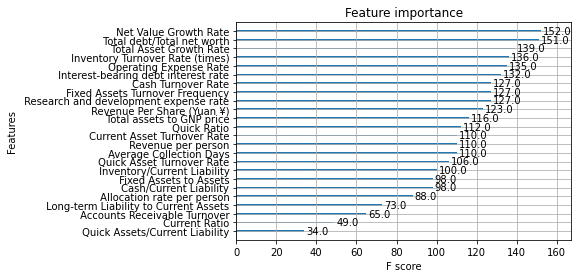

In [24]:
#Plotting features importance
plot_importance(xgb_model)
pyplot.show()